# Explorando a Relação Entre Música, Ritmo e Saúde Mental

Para muitas pessoas, como eu, a música é uma companhia constante, seja em momentos de alegria ou tristeza. O ritmo das canções que escolhemos pode influenciar nosso estado emocional, trazendo conforto em tempos difíceis ou nos deixando mais alegres. A música atua com um poder de cura capaz de conectar emoções e promover bem-estar, independentemente do momento vivido.

Como gosto muito de ouvir música e sempre me questionei sobre a relação entre a música e o efeito emocional, resolvi procurar datasets relacionados a música e saúde mental. Encontrei no Kaggle o dataset: [MXMH Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results).


## Preparação do Ambiente e Carregamento dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p "/content/drive/MyDrive/Colab Datasets/music-mental-health"

import os
from zipfile import ZipFile
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import numpy as np


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.plotting.backend = 'plotly'
sns.set()


In [ ]:
pasta = '/content/drive/MyDrive/Colab Datasets/music-mental-health'
file_music_health = os.path.join(pasta, "music_health.zip")

with ZipFile(file_music_health) as z:
    with z.open('mxmh_survey_results.csv') as f:
        music_health = pd.read_csv(f, sep=',', encoding='ISO-8859-1', decimal=',')


music_health = pd.DataFrame(music_health)


In [ ]:
music_health.info()


def check_df(music_health, head=5):
    print("\nShape")
    print(music_health.shape)
    print("\nTypes")
    print(music_health.dtypes)
    print("\nNANs")
    print(music_health.isnull().sum())
    print("\nInfo")
    print(music_health.info())
check_df(music_health)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    object 
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# Detecção de um valor valor fora do padrão

À primeira vista, pensei que fosse um outlier, mas não encontrei outliers nos demais registros. Cheguei a calcular os outliers para poder removê-los, porém, depois pensei melhor e vi que a melhor solução era retirar esse único registro com valor discrepante



In [ ]:
print(music_health['BPM'].max())
print(music_health['BPM'].min())

999999999.0
0.0


In [ ]:
music_health = music_health[(music_health.BPM<500) & (music_health.BPM >20)]
print(music_health['BPM'].max())
print(music_health['BPM'].min())

220.0
40.0


In [ ]:
mean_bpm = music_health['BPM'].mean()


music_health['BPM'].fillna(mean_bpm, inplace=True)

music_health['BPM'] = music_health['BPM'].round()

music_health['BPM'] = music_health['BPM'].astype(int)

# Preparação, Limpeza de Dados, Limpeza e Conversão de Tipos de Dados

In [ ]:
music_health.dropna(subset=['Age', 'Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects'], inplace=True)

convert_types = {
    'Age': int,
    'Hours per day': float,
    'Anxiety': float,
    'Depression': float,
    'Insomnia': float,
    'OCD': float
}
music_health = music_health.astype(convert_types)

In [ ]:

music_health = music_health.rename(columns={
    'Frequency [Country]': 'Country',
    'Frequency [EDM]': 'Música Eletrônica',
    'Frequency [Folk]': 'Folk',
    'Frequency [Gospel]': 'Gospel',
    'Frequency [Hip hop]': 'Hip Hop',
    'Frequency [Jazz]': 'Jazz',
    'Frequency [K pop]': 'K Pop',
    'Frequency [Latin]': 'Música Latina',
    'Frequency [Lofi]': 'Lofi',
    'Frequency [Metal]': 'Metal',
    'Frequency [Pop]': 'Pop',
    'Frequency [R&B]': 'R&B',
    'Frequency [Rap]': 'Rap',
    'Frequency [Rock]': 'Rock',
    'Frequency [Video game music]': 'Música de Video Game',
    'Age': 'Idade',
    'Primary streaming service': 'Plataforma de Streaming',
    'Hours per day': 'Horas Por Dia',
    'While working': 'Enquanto Trabalha',
    'Instrumentalist': 'Instrumentalista',
    'Composer': 'Compositor',
    'Fav genre': 'Gênero Favorito',
    'Exploratory': 'Explorador',
    'Foreign languages': 'Língua Estrangeira',
    'Classical': 'Música Clássica',
    'Anxiety': 'Ansiedade',
    'Depression': 'Depressão',
    'Insomnia': 'Insônia',
    'OCD': 'TOC',
    'Music effects': 'Efeitos Musicais'
})

if 'Permissions' in music_health.columns:
    music_health = music_health.drop('Permissions', axis=1)


In [ ]:
music_health[['Enquanto Trabalha', 'Instrumentalista', 'Compositor', 'Explorador', 'Língua Estrangeira']] = music_health[['Enquanto Trabalha', 'Instrumentalista', 'Compositor', 'Explorador', 'Língua Estrangeira']].replace({'Yes': 'Sim', 'No': 'Não'})


In [ ]:
music_health[['Efeitos Musicais']].replace({
    'No effect': 'Sem efeito',
    'Improve': 'Melhorou',
    'Worsen': 'Piorou'
}, inplace=True)


<ipython-input-11-5d824fd0f70c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_health[['Efeitos Musicais']].replace({


In [ ]:
translate_genre ={
    'Video game music':'Música de Video Game',
    'EDM':'Música Eltrónica',
    'Classical':'Música Clássica',
    'Latin': 'Música Latina'
}

music_health['Gênero Favorito'].replace(translate_genre, inplace=True)

In [ ]:
music_health['Gênero Favorito'].replace({
    'No effect': 'Sem efeito',
    'Improve': 'Melhorou',
    'Worsen': 'Piorou'
}, inplace=True)

In [ ]:
music_health['Plataforma de Streaming'].unique()

array(['Spotify', 'YouTube Music', 'I do not use a streaming service.',
       'Apple Music', 'Other streaming service', 'Pandora'], dtype=object)

In [ ]:
music_health['Plataforma de Streaming'].replace({
    'I do not use a streaming service.': 'Não uso Plataforma de Streaming',
    'Other streaming service': 'Outro Serviço'
}, inplace=True)

In [ ]:
music_health.columns

Index(['Timestamp', 'Idade', 'Plataforma de Streaming', 'Horas Por Dia',
       'Enquanto Trabalha', 'Instrumentalista', 'Compositor',
       'Gênero Favorito', 'Explorador', 'Língua Estrangeira', 'BPM',
       'Frequency [Classical]', 'Country', 'Música Eletrônica', 'Folk',
       'Gospel', 'Hip Hop', 'Jazz', 'K Pop', 'Música Latina', 'Lofi', 'Metal',
       'Pop', 'R&B', 'Rap', 'Rock', 'Música de Video Game', 'Ansiedade',
       'Depressão', 'Insônia', 'TOC', 'Efeitos Musicais'],
      dtype='object')

In [ ]:
music_health = music_health.dropna(subset=['Idade', 'Plataforma de Streaming', 'Enquanto Trabalha', 'Instrumentalista', 'Compositor', 'Língua Estrangeira', 'Efeitos Musicais'])


# Parte 1: Análise de Perfil com Base nas Respostas


Nesta primeira parte, eu realizei uma análise dos perfis dos usuários com base nas respostas fornecidas.

A análise inclui:

- **Identificação de Grupos Etários:** Categorias etárias para avaliar como diferentes faixas etárias interagem com os serviços de streaming.
- **Preferências de Gênero Musical:** Preferências de gênero musical entre diferentes perfis etários.
- **Comportamento de Uso:** Horas de música ouvidas por dia e como isso varia entre os grupos.




In [ ]:
count_answers = music_health['Idade'].notnull().sum()
count_answers

608

In [ ]:
exploratory_counts = music_health['Explorador'].value_counts().reset_index(name='Qtd. Respostas')
exploratory_counts.columns = ['Explorador','Qtd. Respostas']

exploratory_counts

,Explorador,Qtd. Respostas
0,Sim,445
1,Não,163


In [ ]:
instrumentalist_counts = music_health['Instrumentalista'].value_counts().reset_index(name='Qtd. Respostas')
instrumentalist_counts.columns = ['Instrumentalista','Qtd. Respostas']

instrumentalist_counts

,Instrumentalista,Qtd. Respostas
0,Não,410
1,Sim,198


In [ ]:
music_health.groupby('Plataforma de Streaming')['Horas Por Dia'].sum().sort_values(ascending=False).reset_index()

,Plataforma de Streaming,Horas Por Dia
0,Spotify,1545.50
1,YouTube Music,238.25
2,Não uso Plataforma de Streaming,180.50
3,Apple Music,161.00
4,Outro Serviço,116.45
5,Pandora,16.00


## Horas Totais de Uso por Plataforma de Streaming: Comparação de Serviços

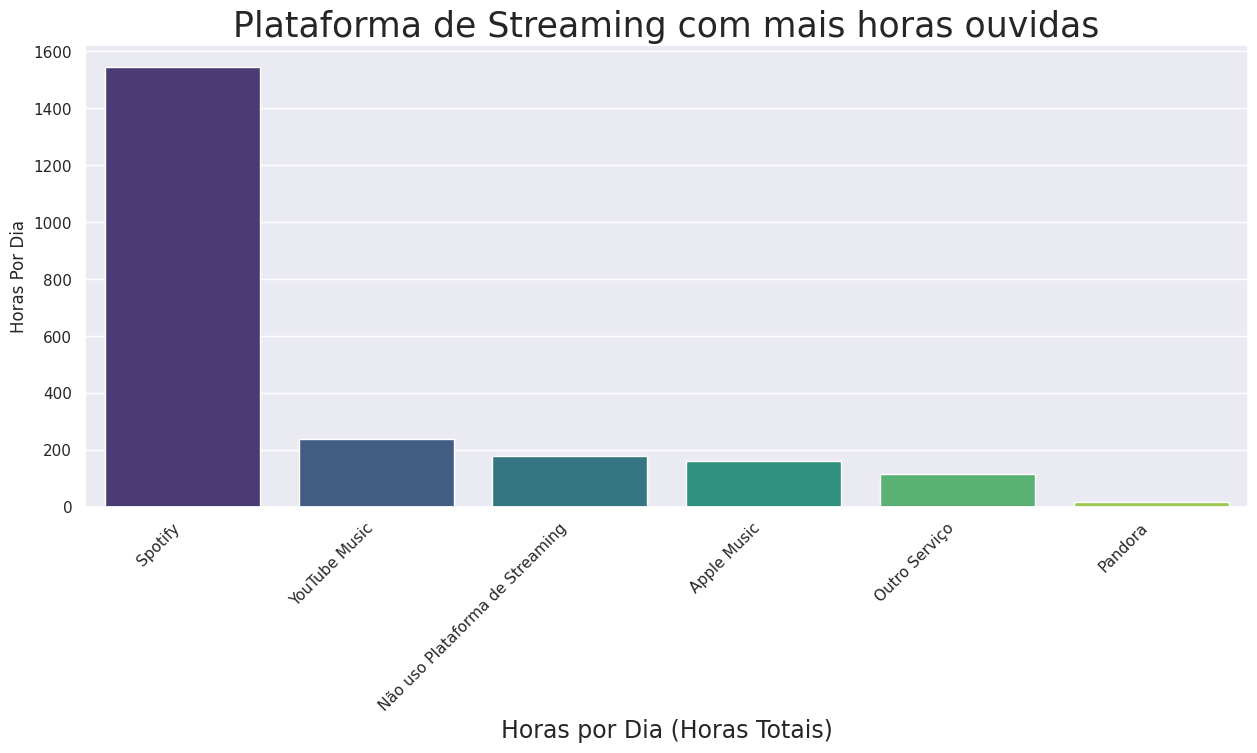

In [ ]:
platform_per_hour= (music_health.groupby('Plataforma de Streaming')['Horas Por Dia']
                      .sum()
                      .sort_values(ascending=False)
                      .reset_index())

plt.figure(figsize=(15,6))
sns.barplot(data=platform_per_hour, x='Plataforma de Streaming', y='Horas Por Dia', palette='viridis')




plt.xticks(rotation=45, ha='right')


plt.title('Plataforma de Streaming com mais horas ouvidas', fontsize=25)
plt.xlabel('Plataforma de Streaming', fontsize=18)
plt.xlabel('Horas por Dia (Horas Totais)', fontsize=17)

plt.show()


## Frequência de Uso das Plataformas de Streaming Durante o Trabalho



In [ ]:
music_health.groupby('Plataforma de Streaming')['Enquanto Trabalha'].value_counts().sort_values(ascending=False).reset_index(name='Count. Respostas')

,Plataforma de Streaming,Enquanto Trabalha,Count. Respostas
0,Spotify,Sim,322
1,Spotify,Não,70
2,YouTube Music,Sim,55
3,Não uso Plataforma de Streaming,Sim,41
4,Apple Music,Sim,33
5,Outro Serviço,Sim,28
6,YouTube Music,Não,18
7,Não uso Plataforma de Streaming,Não,14
8,Outro Serviço,Não,11
9,Apple Music,Não,9


In [ ]:
working_per_platform = (music_health.groupby('Plataforma de Streaming')['Enquanto Trabalha']
                        .value_counts()
                        .reset_index(name='Count. Respostas')
                        .sort_values(by='Count. Respostas', ascending=True))

fig = px.bar(working_per_platform,
             y='Plataforma de Streaming',
             x='Count. Respostas',
             color='Enquanto Trabalha',
             title='Plataforma de Streaming Utilizadas Durante o Trabalho',
             text='Count. Respostas')

fig.update_layout(
    xaxis_title='',
    yaxis_title='Plataforma de Streaming',
    title={'text': 'Plataforma de Streaming Utilizadas Durante o Trabalho', 'x': 0.5, 'xanchor': 'center'},
    title_font_size=25,
    xaxis_title_font_size=18,
    yaxis_title_font_size=17
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [ ]:
favorite_genre = music_health.groupby('Gênero Favorito')['Horas Por Dia'].sum().sort_values(ascending=False).reset_index()
favorite_genre


,Gênero Favorito,Horas Por Dia
0,Rock,555.70
1,Pop,297.00
2,Metal,282.50
3,Música Eltrónica,164.00
4,Hip hop,124.50
5,Rap,113.00
6,Música Clássica,107.75
7,Música de Video Game,107.25
8,Jazz,106.50
9,R&B,102.00


 # Horas Diárias por Gênero Musical Preferido

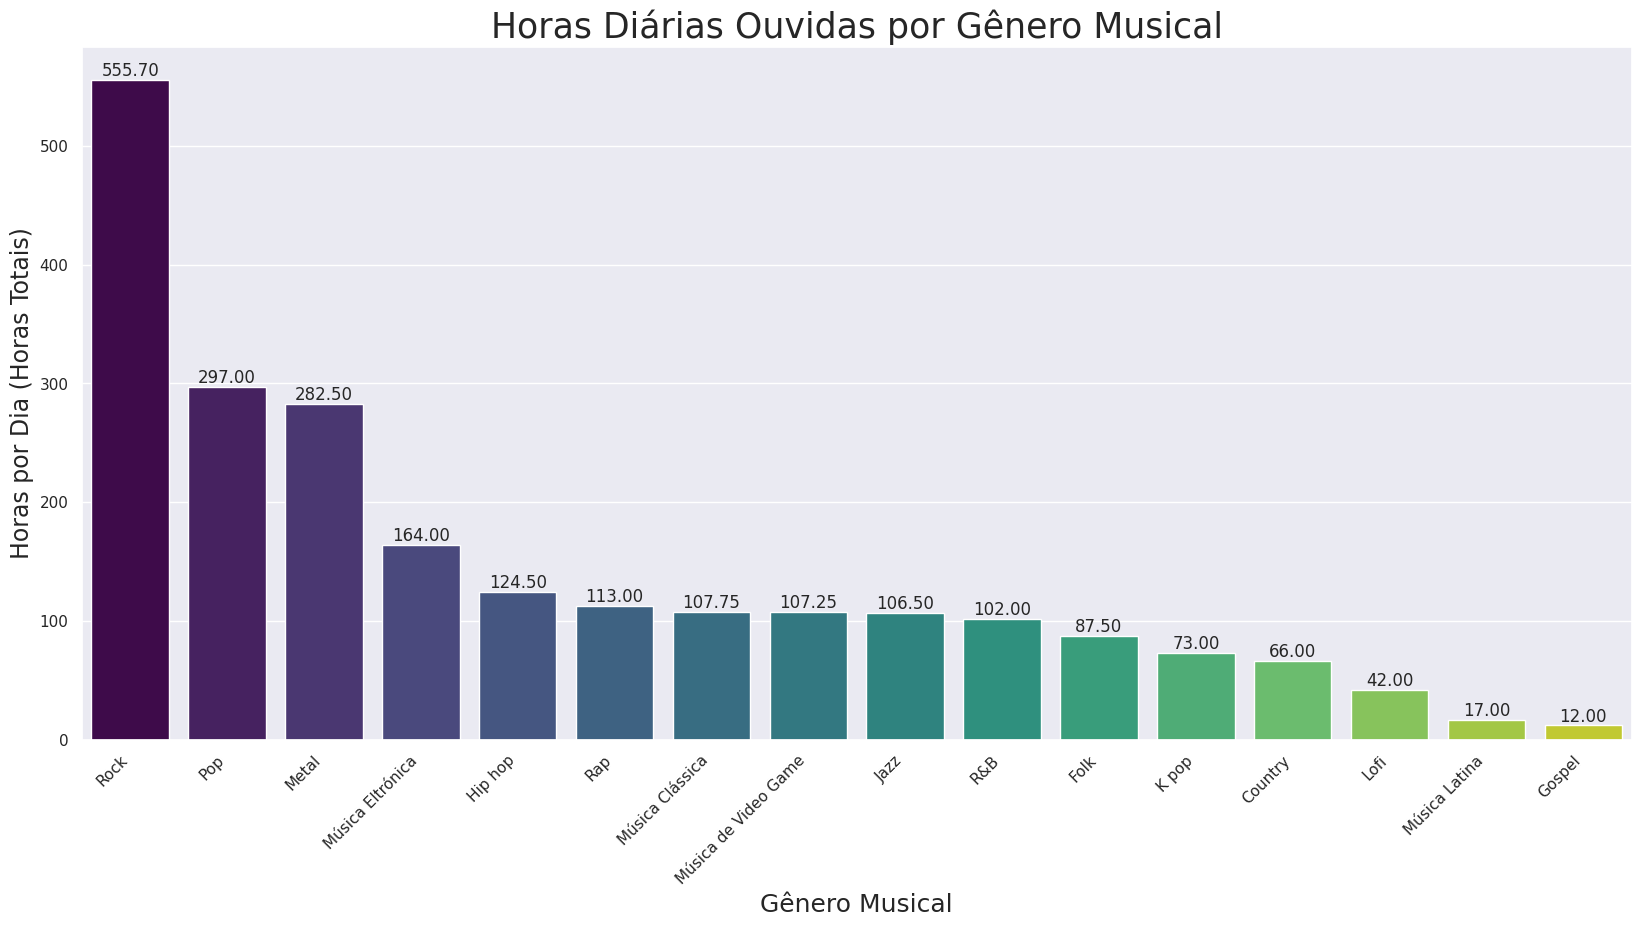

In [ ]:
favorite_genre = (music_health.groupby('Gênero Favorito')['Horas Por Dia']
                      .sum()
                      .sort_values(ascending=False)
                      .reset_index())

import matplotlib.colors as mcolors


viridis = plt.colormaps['viridis']
n_colors = len(favorite_genre['Gênero Favorito'].unique())
viridis_colors = [mcolors.to_hex(viridis(i / n_colors)) for i in range(n_colors)]

plt.figure(figsize=(20, 9))
sns.barplot(data=favorite_genre,
            x= 'Gênero Favorito',
            y='Horas Por Dia',
            palette=viridis_colors)


for index, value in enumerate(favorite_genre['Horas Por Dia']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')


plt.title('Horas Diárias Ouvidas por Gênero Musical', fontsize=25)
plt.xlabel('Gênero Musical', fontsize=18)
plt.ylabel('Horas por Dia (Horas Totais)', fontsize=17)

plt.show()

# Definição de Intervalos por Faixa Etária




Nesta segmentação, eu defifini um intervalos de idade para categorizar a idade. Utilizei os seguintes intervalos:

- **0 a 12 anos:** Criança
- **13 a 17 anos:** Adolescente
- **18 a 29 anos:** Jovem Adulto
- **30 a 59 anos:** Adulto
- **60 a 100 anos:** Idoso


In [ ]:
music_health['Idade'].unique()

array([18, 61, 21, 19, 16, 17, 15, 14, 26, 20, 23, 37, 36, 24, 22, 25, 32,
       29, 41, 30, 43, 31, 28, 34, 13, 35, 27, 53, 49, 42, 60, 33, 44, 40,
       64, 38, 56, 59, 10, 57, 12, 69, 72, 39, 63, 58, 67, 70, 55, 48, 74,
       51, 65, 80, 50, 46, 89])

In [ ]:
age_bins= [0,13,18,30,60,100]
age_labes = ['Criança', 'Adolescente','Jovem Adulto ', 'Adulto', 'Idoso']

music_health['Faixa Etária'] = pd.cut(music_health['Idade'], bins=age_bins, labels=age_labes, right=False)


In [ ]:
agegroup_streaming = music_health.groupby(['Faixa Etária', 'Plataforma de Streaming'],observed=True).size().sort_values(ascending=False).reset_index(name='Freq')
agegroup_streaming


,Faixa Etária,Plataforma de Streaming,Freq
0,Jovem Adulto,Spotify,236
1,Adolescente,Spotify,98
2,Adulto,Spotify,53
3,Jovem Adulto,YouTube Music,45
4,Jovem Adulto,Não uso Plataforma de Streaming,32
5,Jovem Adulto,Apple Music,24
6,Adulto,YouTube Music,19
7,Adulto,Não uso Plataforma de Streaming,15
8,Jovem Adulto,Outro Serviço,14
9,Adulto,Outro Serviço,13


# Horas de Streaming por Faixa Etária e Serviço de Streaming


In [ ]:
fig = px.treemap(music_health,
                 path=['Plataforma de Streaming', 'Faixa Etária'],
                 values='Horas Por Dia',
                 title='Serviços de Streaming Principal por Faixa Etária',
                 labels={'Hours per day': 'Horas por Dia', 'Age Group': 'Faixa Etária', 'Primary streaming service': 'Serviço de Streaming'})


fig.update_traces(
    textinfo='label+value',
    textfont=dict(size=14)
)


fig.show()

# Parte 2: Análise da Relação entre Preferências Musicais, Faixa Etária e Bem-Estar Emocional


In [ ]:
mental_symptoms = ['Ansiedade','Depressão', 'Insônia','TOC']

mental_symptoms_df = music_health[mental_symptoms].reset_index(drop=True)

mental_symptoms_df

,Ansiedade,Depressão,Insônia,TOC
0,7.0,7.0,10.0,2.0
1,9.0,7.0,3.0,3.0
2,7.0,2.0,5.0,9.0
3,8.0,8.0,7.0,7.0
4,4.0,8.0,6.0,0.0
...,...,...,...,...
603,7.0,6.0,0.0,9.0
604,3.0,2.0,2.0,5.0
605,2.0,2.0,2.0,2.0
606,2.0,3.0,2.0,1.0


In [ ]:
mental_symptoms = ['Ansiedade','Depressão', 'Insônia','TOC']

correlation_mental_symptoms  = music_health[mental_symptoms].corr()


In [ ]:
music_health['Avaliação de Saúde Mental'] = music_health[['Ansiedade','Depressão', 'Insônia','TOC']].mean(axis=1)

bins = [0,3,6,8,10]
labels = ['Baixo','Moderado','Alto','Muito Alto']
music_health['Avaliação de Saúde Mental'] = pd.cut(music_health['Avaliação de Saúde Mental'], bins=bins, labels=labels)

print(music_health[['Ansiedade','Depressão', 'Insônia','TOC', 'Avaliação de Saúde Mental']].head())

   Ansiedade  Depressão  Insônia  TOC Avaliação de Saúde Mental
2        7.0        7.0     10.0  2.0                      Alto
3        9.0        7.0      3.0  3.0                  Moderado
4        7.0        2.0      5.0  9.0                  Moderado
5        8.0        8.0      7.0  7.0                      Alto
6        4.0        8.0      6.0  0.0                  Moderado


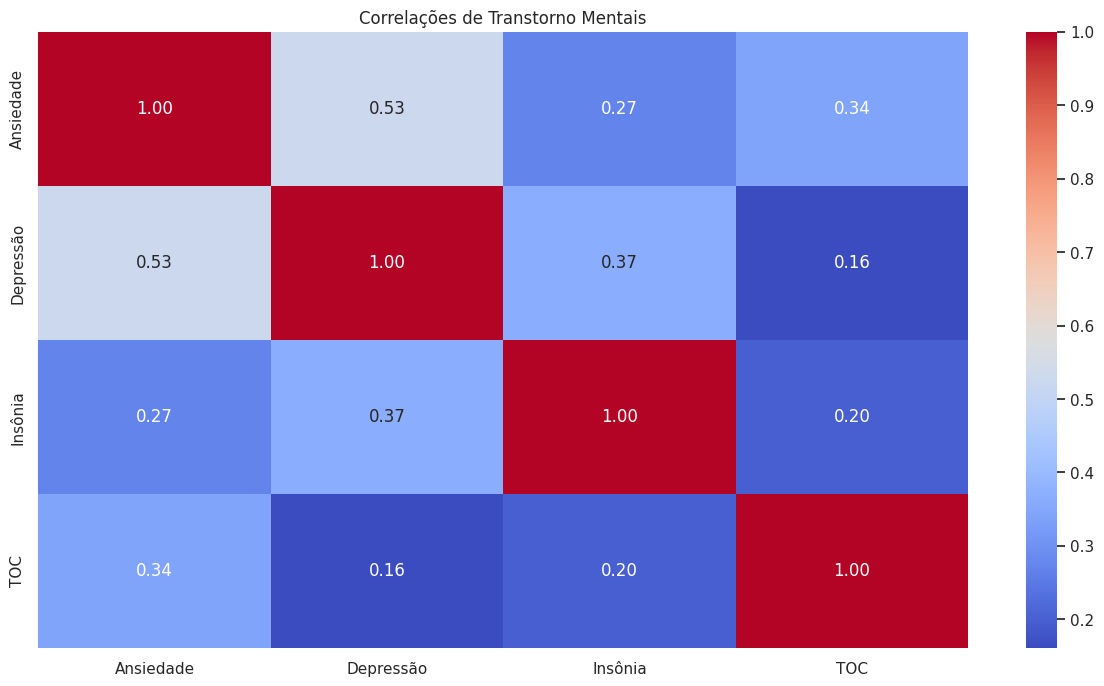

In [ ]:
correlation_matrix = mental_symptoms_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlações de Transtorno Mentais')
plt.show()

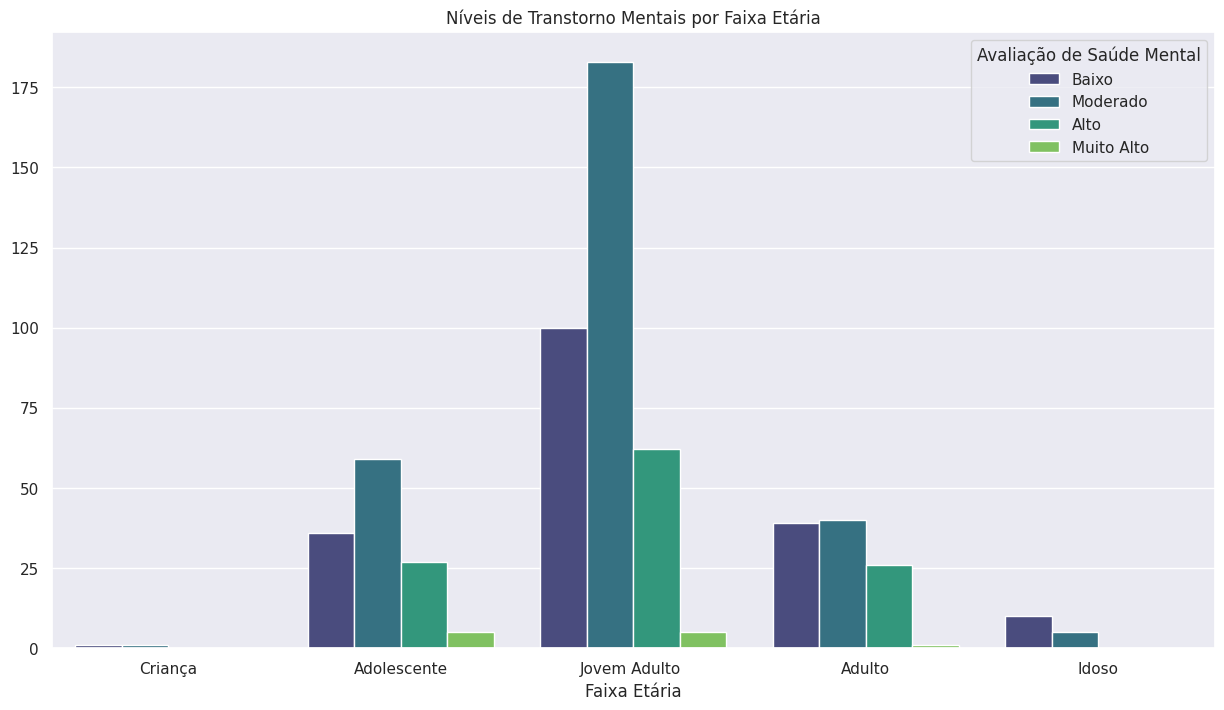

In [ ]:
agegroup_by_score = music_health[['Faixa Etária','Avaliação de Saúde Mental']].reset_index(drop=True);


plt.figure(figsize=(15, 8))
sns.countplot(data=agegroup_by_score, x='Faixa Etária', hue='Avaliação de Saúde Mental', palette='viridis')
plt.title('Níveis de Transtorno Mentais por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('')
plt.legend(title='Avaliação de Saúde Mental')
plt.show()

In [ ]:
agegroup_by_score

,Faixa Etária,Avaliação de Saúde Mental
0,Jovem Adulto,Alto
1,Idoso,Moderado
2,Jovem Adulto,Moderado
3,Jovem Adulto,Alto
4,Jovem Adulto,Moderado
...,...,...
603,Adolescente,Moderado
604,Jovem Adulto,Baixo
605,Jovem Adulto,Baixo
606,Jovem Adulto,Baixo


In [ ]:
mental_symptoms = ['Ansiedade','Depressão', 'Insônia','TOC']


agegroup_by_effects = music_health[music_health[mental_symptoms].gt(8).any(axis=1)][['Faixa Etária'] + mental_symptoms]
agegroup_by_effects

,Faixa Etária,Ansiedade,Depressão,Insônia,TOC
2,Jovem Adulto,7.0,7.0,10.0,2.0
3,Idoso,9.0,7.0,3.0,3.0
4,Jovem Adulto,7.0,2.0,5.0,9.0
17,Adolescente,5.0,7.0,10.0,0.0
20,Adolescente,6.0,9.0,3.0,0.0
...,...,...,...,...,...
721,Jovem Adulto,10.0,8.0,1.0,0.0
723,Adolescente,10.0,7.0,6.0,10.0
725,Adolescente,10.0,10.0,8.0,4.0
726,Jovem Adulto,9.0,8.0,5.0,10.0


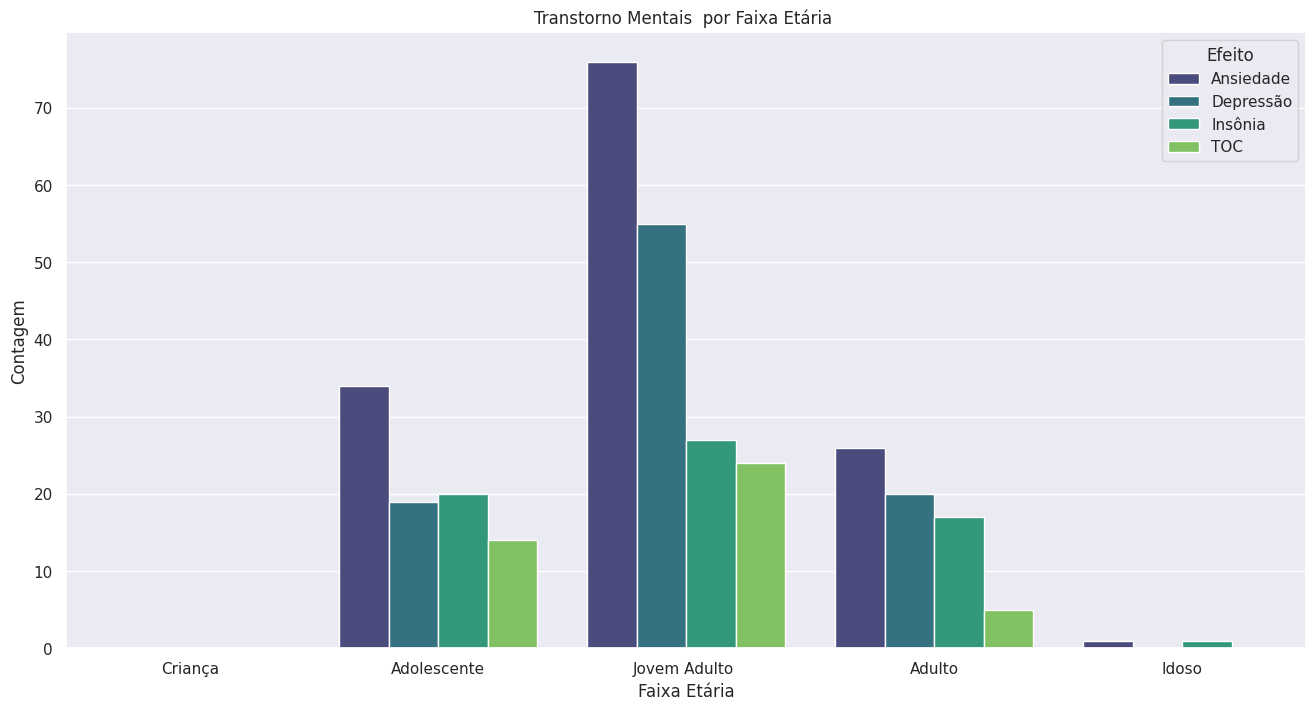

In [ ]:
genre_by_effects = music_health.groupby('Gênero Favorito')[mental_symptoms].mean().reset_index()

genre_by_effects_melt = genre_by_effects.melt(id_vars='Gênero Favorito', value_vars=mental_symptoms,
                                              var_name='Avaliação de Saúde Mental', value_name='Total Score')

agegroup_long = agegroup_by_effects.melt(id_vars=['Faixa Etária'], value_vars=mental_symptoms,
                                         var_name='Avaliação de Saúde Mental', value_name='Score')

agegroup_long_filtered = agegroup_long[agegroup_long['Score'] > 7]

plt.figure(figsize=(16, 8))
sns.countplot(data=agegroup_long_filtered, x='Faixa Etária', hue='Avaliação de Saúde Mental', palette='viridis')
plt.title('Transtorno Mentais  por Faixa Etária ')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='Efeito')
plt.show()

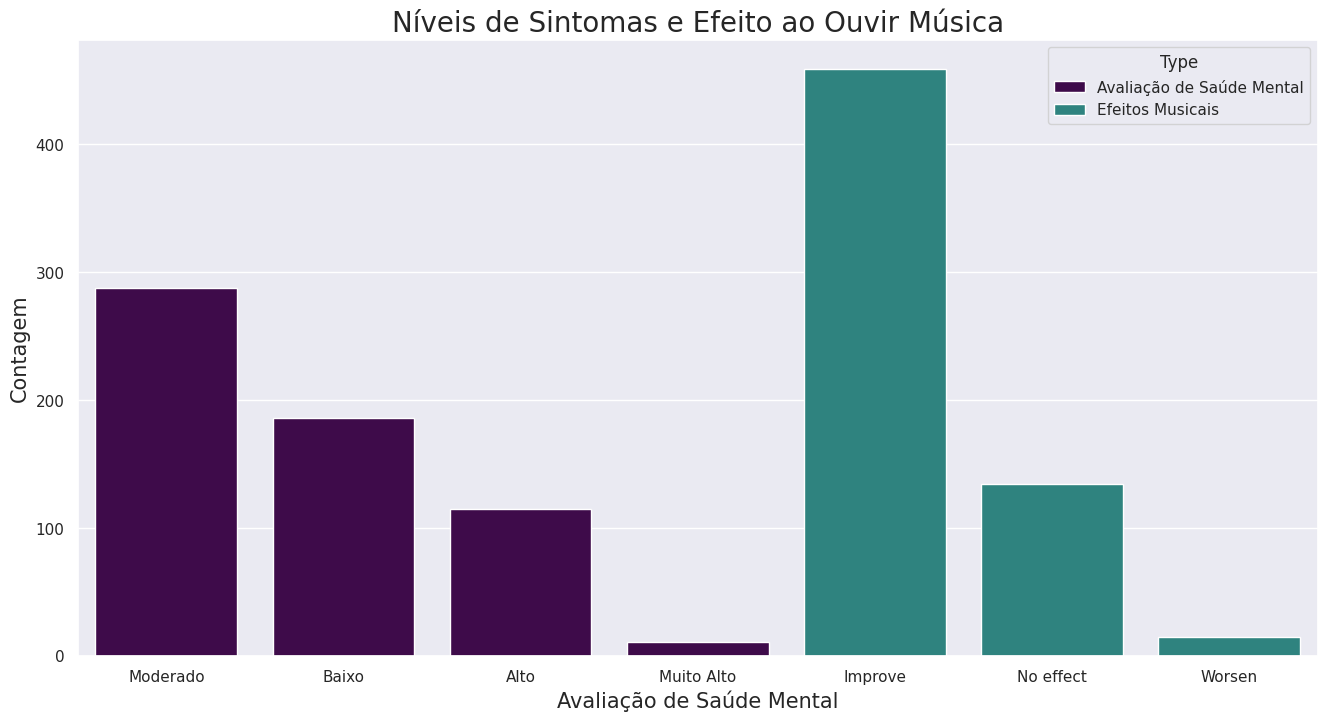

In [ ]:
import matplotlib.colors as mcolors

score_counts = music_health['Avaliação de Saúde Mental'].value_counts().reset_index()
score_counts.columns = ['Score', 'Count']
score_counts['Type'] = 'Avaliação de Saúde Mental'

music_effects_counts = music_health['Efeitos Musicais'].value_counts().reset_index(name='Count')
music_effects_counts.columns = ['Score', 'Count']
music_effects_counts['Type'] = 'Efeitos Musicais'

combined_counts = pd.concat([score_counts, music_effects_counts])

viridis = plt.colormaps['viridis']
n_types = len(combined_counts['Type'].unique())
viridis_colors = [mcolors.to_hex(viridis(i / n_types)) for i in range(n_types)]

plt.figure(figsize=(16, 8))
sns.barplot(data=combined_counts,
            x='Score',
            y='Count',
            hue='Type',
            palette=viridis_colors)

plt.title('Níveis de Sintomas e Efeito ao Ouvir Música', fontsize=20)
plt.xlabel('Avaliação de Saúde Mental', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

plt.show()




---
# Parte 3: Análise de BPM

Objetivo:
Analisar a distribuição de batidas por minuto (BPM) das músicas preferidas pelos participantes, cruzando esses dados com fatores de saúde mental e categorias etárias, a fim de identificar padrões que possam estar associados ao impacto da música no bem-estar.

Criei uma faixa para facilitar a análise para cada valor de BPM.


- **Calmo:** Menos de 60 BPM
- **Feliz:** De 60 a 89 BPM
- **Energético:** De 90 a 139 BPM
- **Intenso:** 140 BPM ou mais

In [ ]:
def classify_bpm(bpm):
    if bpm <60:
      return 'Calmo'
    elif 60 <=bpm <90:
      return 'Feliz'
    elif 90 <= bpm < 140:
      return 'Energético'
    else:
      return 'Intenso'

music_health['Classificação BPM'] = music_health['BPM'].apply(classify_bpm)


In [ ]:
bpm_ansewers = music_health['Classificação BPM'].value_counts().reset_index(name='Count_of_Ansewers')
bpm_ansewers.columns = ['BPM','Count of Ansewers']

bpm_ansewers

,BPM,Count of Ansewers
0,Energético,338
1,Intenso,187
2,Feliz,78
3,Calmo,5


In [ ]:
bpm_classification = (
    music_health.groupby('BPM')['Classificação BPM']
    .value_counts()
    .sort_values(ascending=False)
    .reset_index(name='Count')
)
bpm_classification

,BPM,Classificação BPM,Count
0,120,Energético,45
1,140,Intenso,24
2,150,Intenso,18
3,110,Energético,16
4,105,Energético,14
...,...,...,...
124,52,Calmo,1
125,159,Intenso,1
126,131,Energético,1
127,139,Energético,1


# Classificação de BPM mais

In [ ]:
agegroup_bpm = music_health[['BPM','Classificação BPM']]
agegroup_bpm

,BPM,Classificação BPM
2,132,Energético
3,84,Feliz
4,107,Energético
5,86,Feliz
6,66,Feliz
...,...,...
731,120,Energético
732,160,Intenso
733,120,Energético
734,170,Intenso


In [ ]:
bpm_classify = music_health.groupby(['Classificação BPM', 'Faixa Etária']).size().unstack()

fig = px.treemap(music_health,
                 path=['Classificação BPM', 'Faixa Etária'],
                 title='Clasificação de BPM Por Faixa Etária',
)


fig.update_traces(
    textinfo='label+value',
    textfont=dict(size=14)
)
fig.show()

Text(0, 0.5, 'Contagem')

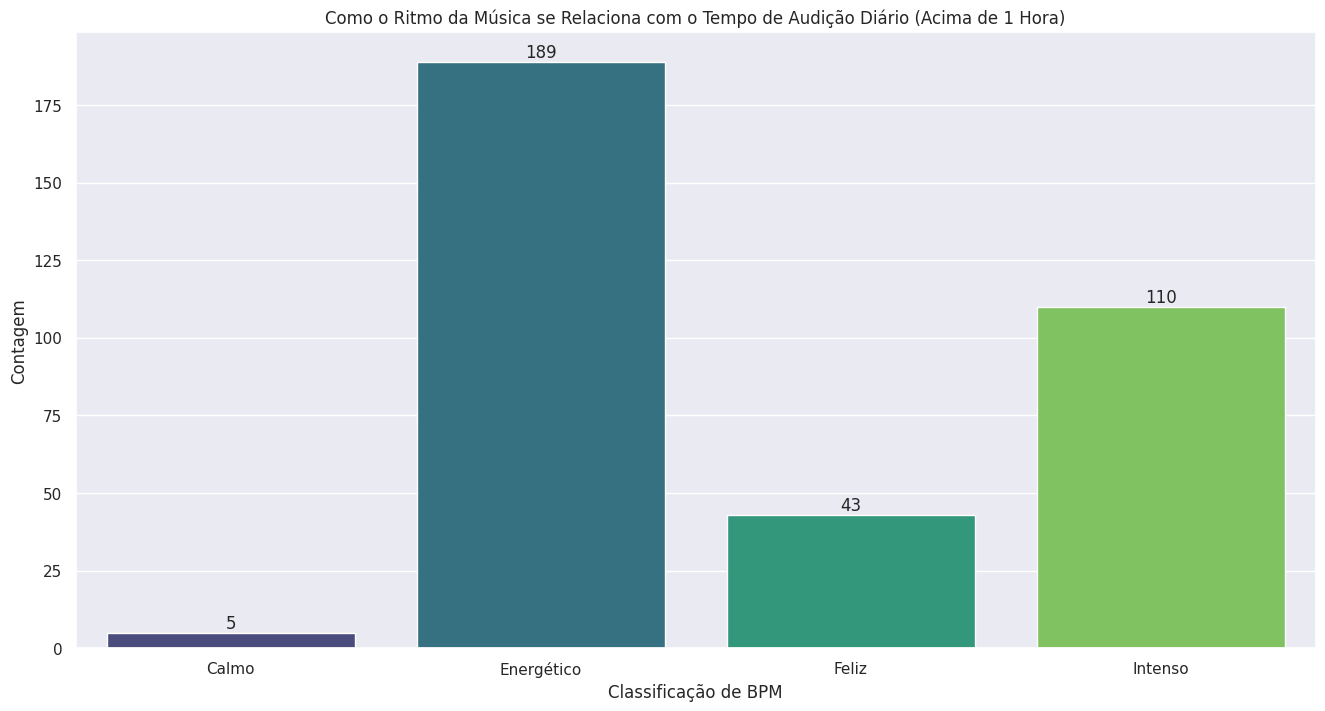

In [ ]:
hour_filtered = music_health[music_health['Horas Por Dia']>2.0]

bpm_by_hours = hour_filtered.groupby('Classificação BPM')['Horas Por Dia'].count().reset_index(name='Count')


plt.figure(figsize=(16, 8))
sns.barplot(data=bpm_by_hours, x='Classificação BPM', y='Count', palette='viridis')

for index, value in enumerate(bpm_by_hours['Count']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.title('Como o Ritmo da Música se Relaciona com o Tempo de Audição Diário (Acima de 1 Hora)')
plt.xlabel('Classificação de BPM')
plt.ylabel('Contagem')

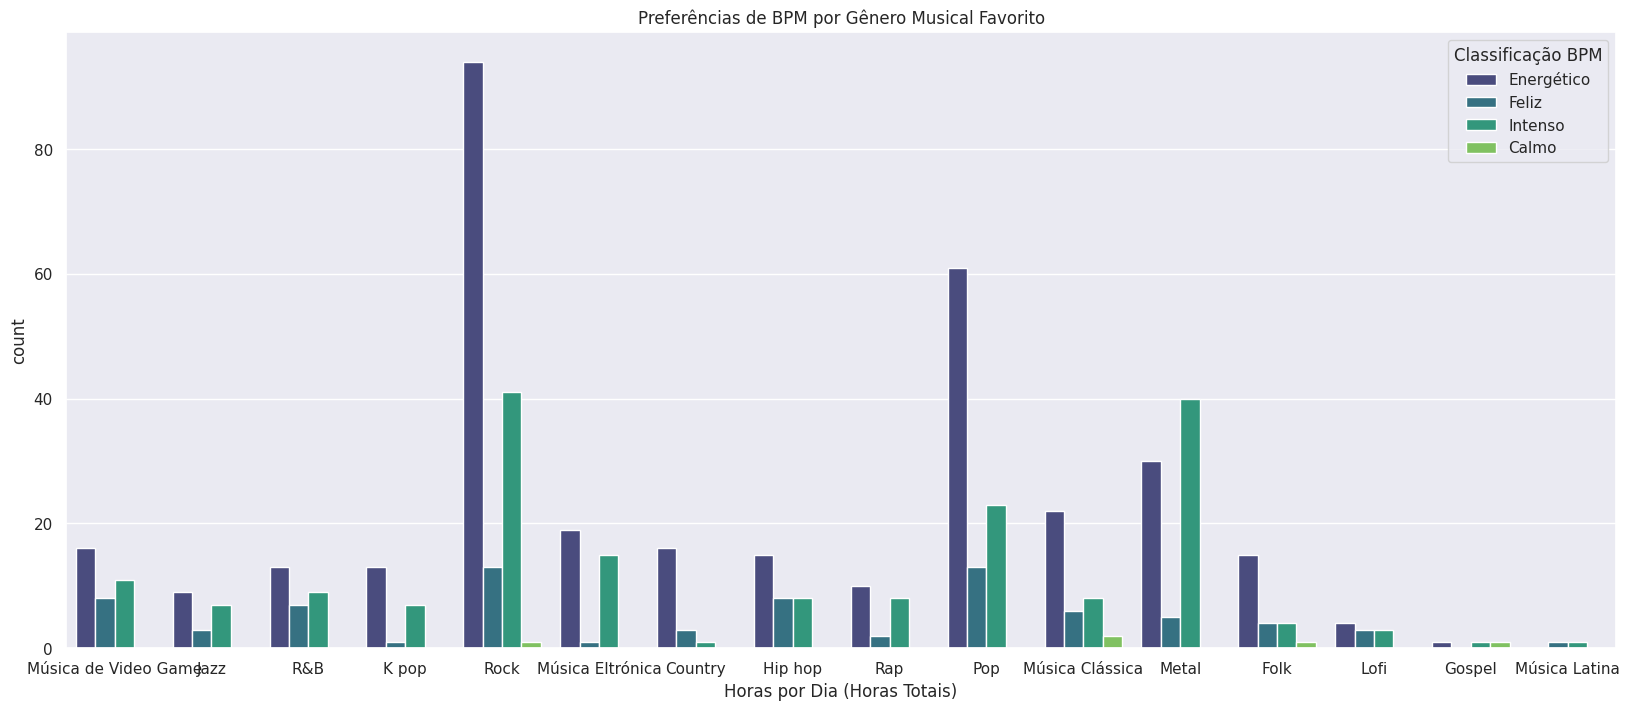

In [ ]:
bpm_genre = music_health[['Gênero Favorito','Classificação BPM']]


plt.figure(figsize=(20,8))
sns.countplot(data=bpm_genre, x='Gênero Favorito', hue='Classificação BPM', palette='viridis')


plt.title('Preferências de BPM por Gênero Musical Favorito')
plt.xlabel('Plataforma de Streming')
plt.xlabel('Horas por Dia (Horas Totais)')

plt.show()



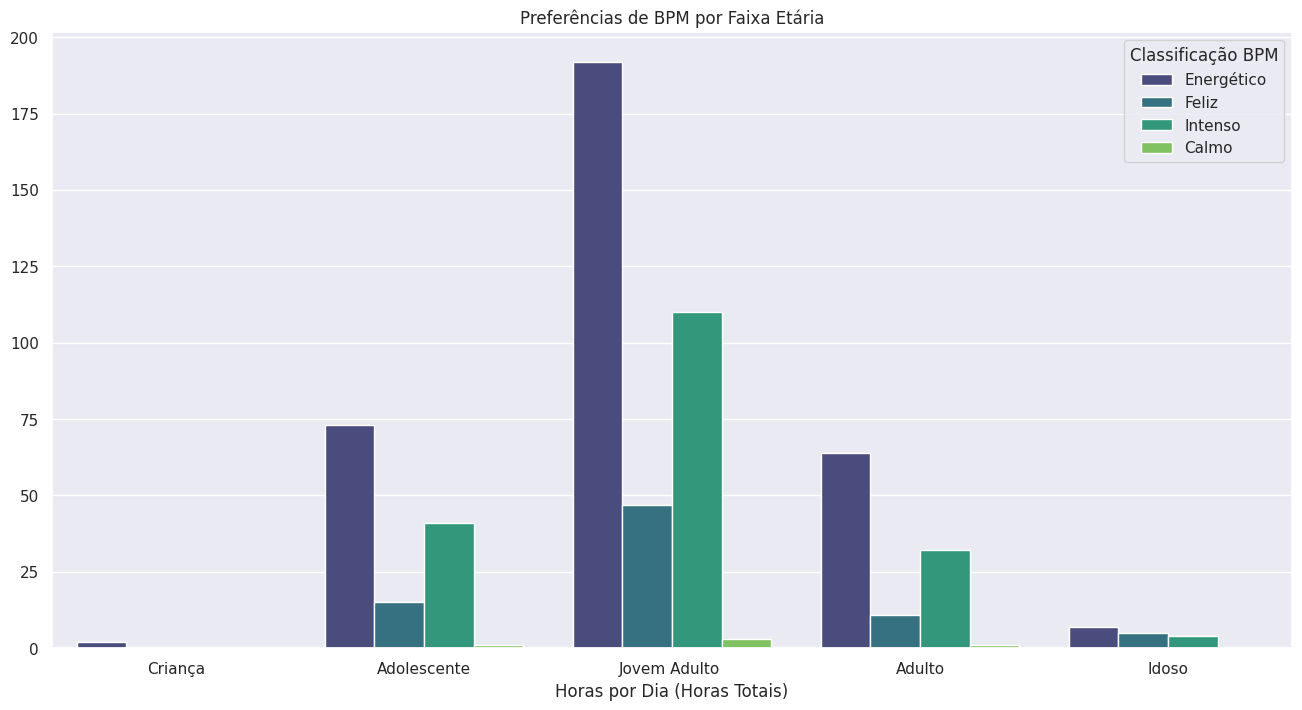

In [ ]:
bpm_agegroup = music_health[['Classificação BPM','Faixa Etária']]


plt.figure(figsize=(16,8))
sns.countplot(data=bpm_agegroup, x='Faixa Etária', hue='Classificação BPM', palette='viridis')


plt.title('Preferências de BPM por Faixa Etária')
plt.xlabel('Plataforma de Streming')
plt.xlabel('Horas por Dia (Horas Totais)')
plt.ylabel('')

plt.show()


In [ ]:
mental_symptoms = ['Ansiedade','Depressão', 'Insônia','TOC']

effects_bpm = music_health[music_health[mental_symptoms].gt(8).any(axis=1)][['Classificação BPM'] + mental_symptoms]
effects_bpm

,Classificação BPM,Ansiedade,Depressão,Insônia,TOC
2,Energético,7.0,7.0,10.0,2.0
3,Feliz,9.0,7.0,3.0,3.0
4,Energético,7.0,2.0,5.0,9.0
17,Energético,5.0,7.0,10.0,0.0
20,Energético,6.0,9.0,3.0,0.0
...,...,...,...,...,...
721,Intenso,10.0,8.0,1.0,0.0
723,Energético,10.0,7.0,6.0,10.0
725,Energético,10.0,10.0,8.0,4.0
726,Energético,9.0,8.0,5.0,10.0


In [ ]:
mental_symptoms = ['Ansiedade','Depressão', 'Insônia','TOC']

effects_bpm = music_health[mental_symptoms+['Classificação BPM']]
effects_bpm

,Ansiedade,Depressão,Insônia,TOC,Classificação BPM
2,7.0,7.0,10.0,2.0,Energético
3,9.0,7.0,3.0,3.0,Feliz
4,7.0,2.0,5.0,9.0,Energético
5,8.0,8.0,7.0,7.0,Feliz
6,4.0,8.0,6.0,0.0,Feliz
...,...,...,...,...,...
731,7.0,6.0,0.0,9.0,Energético
732,3.0,2.0,2.0,5.0,Intenso
733,2.0,2.0,2.0,2.0,Energético
734,2.0,3.0,2.0,1.0,Intenso


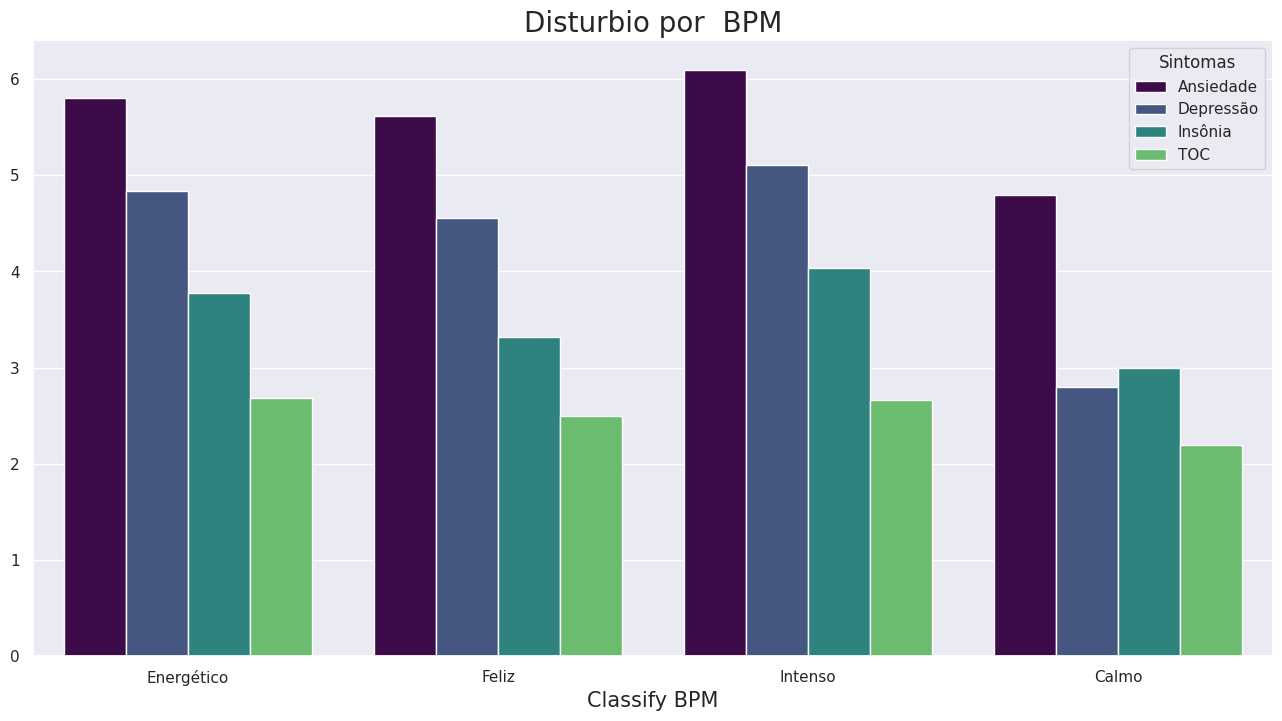

In [ ]:
melted_bpm = effects_bpm.melt(id_vars='Classificação BPM', value_vars=mental_symptoms, var_name='Sintomas', value_name='Freq')

viridis = plt.colormaps['viridis']
n_symptoms = len(melted_bpm['Sintomas'].unique())
viridis_colors = [mcolors.to_hex(viridis(i / n_symptoms)) for i in range(n_symptoms)]

plt.figure(figsize=(16, 8))
sns.barplot(data=melted_bpm,
            x='Classificação BPM',
            y='Freq',
            hue='Sintomas',
            palette=viridis_colors,
            ci=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('Disturbio por  BPM', fontsize=20)
plt.xlabel('Classify BPM', fontsize=15)
plt.ylabel('')



plt.legend(title='Sintomas')
plt.show()

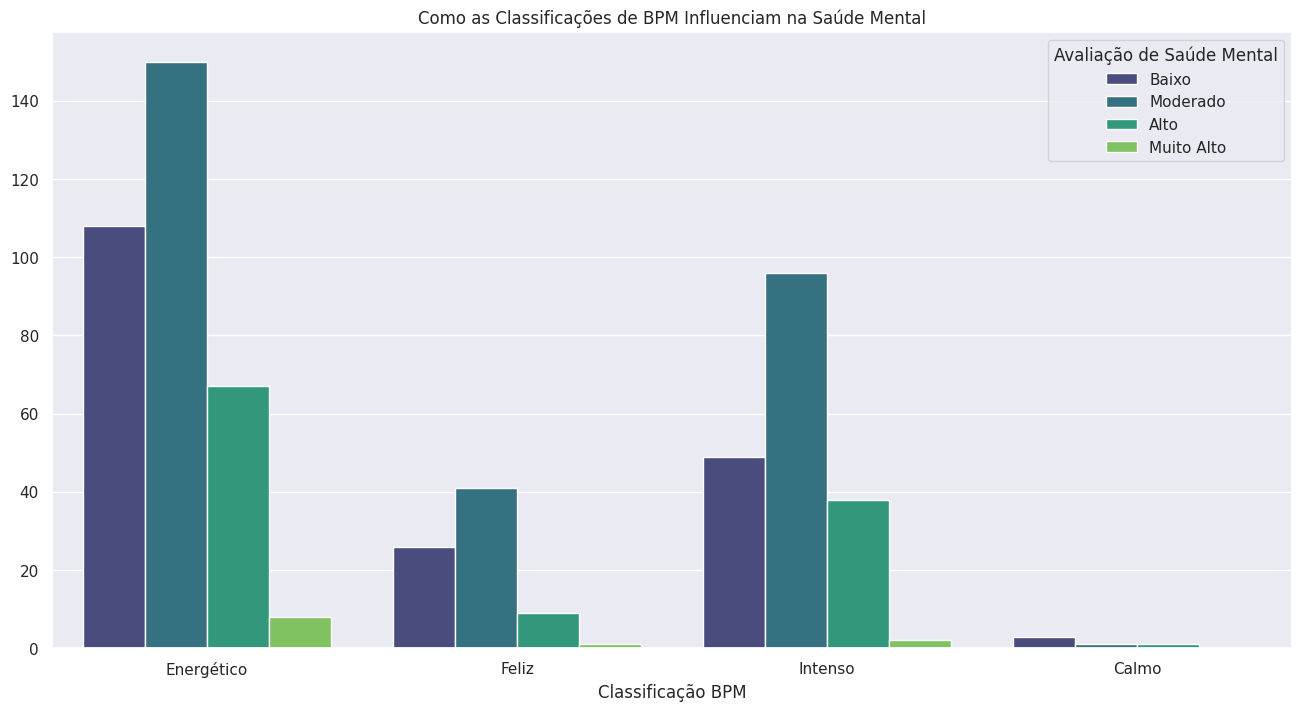

In [ ]:
bpm_score = music_health[['Classificação BPM', 'Avaliação de Saúde Mental']]

plt.figure(figsize=(16, 8))
sns.countplot(data=bpm_score, x='Classificação BPM', hue='Avaliação de Saúde Mental', palette='viridis')

plt.title('Como as Classificações de BPM Influenciam na Saúde Mental')
plt.ylabel('')



plt.show()